# Naive Bayes Classifier example
* Multinomial Naive Bayes - Our data is balanced and text data. Multinomial is best choice here
* Using the youtube dataset - Comments from 5 different videos
* Idea is to classify as 1 = Spam or 0 = Ham

In [21]:
import pandas as pd
import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay

##### Load the data

In [2]:
# \\* means that we get all files inside youtube-dataset folder that end with .csv
files = glob.glob('../data/youtube-dataset\\*.csv')
files

['../data/youtube-dataset\\Youtube01.csv',
 '../data/youtube-dataset\\Youtube02.csv',
 '../data/youtube-dataset\\Youtube03.csv',
 '../data/youtube-dataset\\Youtube04.csv',
 '../data/youtube-dataset\\Youtube05.csv']

In [3]:
# Load the dataframes onto a list
all_df = []

for i in files:
    all_df.append(pd.read_csv(i))

##### Preprocess

In [4]:
# Inspect first dataframe in the list
all_df[0]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1
...,...,...,...,...,...
344,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
345,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
346,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
347,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


* We only require the comment content and what class it belongs to.
* -> We can drop comment_ID, Author and Date columns

In [5]:
# Drop the unnecessary columns from all dfs
for i, df in enumerate(all_df):
    all_df[i] = df.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis = 1)

all_df[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [6]:
# Combine DFs along horizontal axis
data = pd.concat(all_df, axis = 0, ignore_index = True)
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


In [7]:
# Nulls?
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [8]:
# Value counts for class
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

* 1004 spams and 951 hams -> Data is balanced

##### Splitting data into training/test

In [9]:
inputs = data['CONTENT']
target = data['CLASS']

In [10]:
# 80/20 split, seed 365, stratify -> Makes sure the ratio of ham/spam is the same in train and test group
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size = 0.2,
                                                    random_state = 365,
                                                    stratify = target)

In [11]:
# Inspecting the split
y_train.value_counts(), y_test.value_counts()

(1    803
 0    761
 Name: CLASS, dtype: int64,
 1    201
 0    190
 Name: CLASS, dtype: int64)

## Tokenizing the Youtube comments

In [12]:
vectorizer = CountVectorizer()

In [13]:
# Teach the vectorizer all the unique words in x_train and keep track of their counts
x_train_transformed = vectorizer.fit_transform(x_train)
# Ignores all the words in x_test that were not in x_train and for words that were in x_train counts them
x_test_transformed = vectorizer.transform(x_test)

In [14]:
# Sparse matrix of x_train
x_train_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
# Here 1564 is the number of unique messages in x_train
# 3925 is the number of all unique words in all messages in x_train
x_train_transformed.shape

(1564, 3925)

In [16]:
# 391 num of unique messages in x_test
# 3925 all unique words in all messages in x_train 
x_test_transformed.shape

(391, 3925)

## Classification

In [17]:
classifier = MultinomialNB()

In [18]:
classifier.fit(x_train_transformed, y_train)

MultinomialNB()

##### Evaluation

In [19]:
# predictions
y_test_predictions = classifier.predict(x_test_transformed)

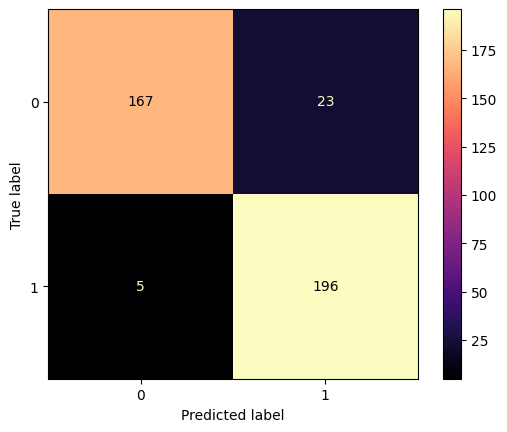

In [22]:
# Confusion Matrix displaying the results for
# Upper left corner: True ham message
# Upper right corner: False ham message
# Lower left corner: False spam message
# Lower right corner: True spam message
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predictions,
                                        labels = classifier.classes_,
                                         cmap = 'magma')

* Correctly predicted ham messages: 167
* Correctly predicted spam messages: 196
* Incorrectly predicted ham messages for spam messages: 23 --- (aka. false positives / type 1 error)
* Incorrectly predicted spam messages for ham messages: 5 --- (aka. false negatives) / type 2 error)

## Further evaluation

* Accuracy
* Precision
* Recall
* F1 score